In [43]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import seaborn as sns ; sns.set()
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
price = pd.read_csv(r'prices.csv')

In [171]:
price.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.43,125.84,122.31,126.25,2.16e+06
1,2016-01-06 00:00:00,WLTW,125.24,119.98,119.94,125.54,2.39e+06
2,2016-01-07 00:00:00,WLTW,116.38,114.95,114.93,119.74,2.49e+06
3,2016-01-08 00:00:00,WLTW,115.48,116.62,113.50,117.44,2.01e+06
4,2016-01-11 00:00:00,WLTW,117.01,114.97,114.09,117.33,1.41e+06


In [217]:
price['symbol'].value_counts().head(10)                         # count the stocks with the most data

XRX    1762
CCI    1762
DHI    1762
HRL    1762
DG     1762
BSX    1762
VAR    1762
L      1762
NOV    1762
BLK    1762
Name: symbol, dtype: int64

In [108]:
pd.set_option('precision', 2)

In [337]:
price_stock = price.loc[price['symbol'] == 'BLK']    
price_stock = price_stock.drop(['close', 'low', 'high', 'volume'], axis=1)   # drop the redundant columns
price_stock.reset_index()
price_stock['50day'] = price_stock['open'].rolling(50).mean()             # 50 day overage
price_stock['200day'] = price_stock['open'].rolling(200).mean() 

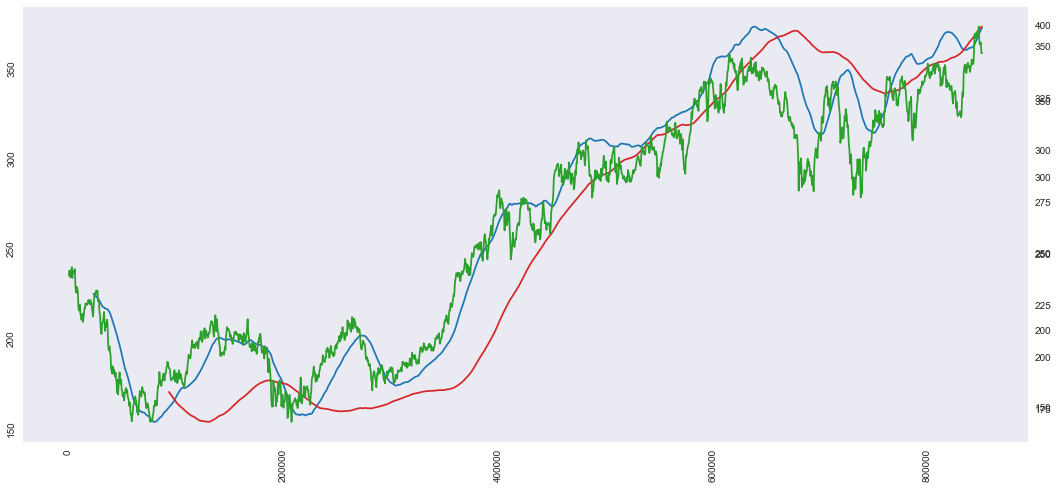

In [338]:
fig, ax1 = plt.subplots(figsize=(18,8))

ax1.plot(price_stock['50day'], color='tab:blue')
ax1.tick_params(labelrotation=90)
ax1.grid(False)
ax2 = ax1.twinx()
ax2.plot(price_stock['200day'], color='tab:red')
ax2.grid(False)
ax3 = ax1.twinx()
ax3.plot(price_stock['open'], color='tab:green')
ax3.grid(False)
#
#ax1.set_xlim([500,1000])

In [339]:
wallet = 10000
stock_count = 0
stock_value = 0

for index,row in price_stock.iterrows():
    
    if np.isnan(row['200day']) == False:
        
        #BUY STOCK
        if row['200day'] >= row['50day']: 
            if wallet > 0:
                amount = (wallet * 0.1) // row['open']
                wallet = wallet - (amount * row['open'])
                stock_count = stock_count + amount
                stock_value = stock_count * row['open']
                            
        #SELL STOCK
        else:
            if stock_count > 0:
                wallet = wallet + (stock_count*row['open'])
                stock_count = 0
                stock_value = 0

print('Time-Period  : ', (price_stock.shape[0])/365, 'years')
print('wallet       : ', wallet)
print('stock count  : ', stock_count)
print('stock value  : ', stock_value)
print('net          : ', ((wallet+stock_value) -10000))

Time-Period  :  4.8273972602739725 years
wallet       :  16318.969441000003
stock count  :  0
stock value  :  0
net          :  6318.969441000003
